In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
sns.set_style("darkgrid")

import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 10

import plotly.graph_objects as go
import plotly.express as px

import pickle
im 9port os
import gc

os.chdir("./제6회 L.POINT Big Data Competition/")

def resumetable(df):
    print(f"DataSet Shape : {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns={'dtypes'})
    summary = summary.reset_index()
    summary["Name"] = summary["index"]
    summary = summary[["Name","dtypes"]]
    summary['Missing'] = df.isnull().sum().values
    summary['Unique'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, "Entropy"] = round(stats.entropy(df[name].value_counts(normalize = True), base=2),2)
        
    return summary

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [2]:
online_df = pd.read_csv("clear_merged_online_df.csv")

In [3]:
audience_id = pd.read_csv("audience_with_group.csv").clnt_id

In [4]:
online_df["is_audience"] = np.where(online_df.clnt_id.isin(audience_id),1,0)

### 접속기기 분포 [ 잠재고객 vs 기존고객 ]  

In [5]:
tmp1 = online_df.drop_duplicates(["clnt_id","sess_id"], keep = "first")

#### 전체 Count

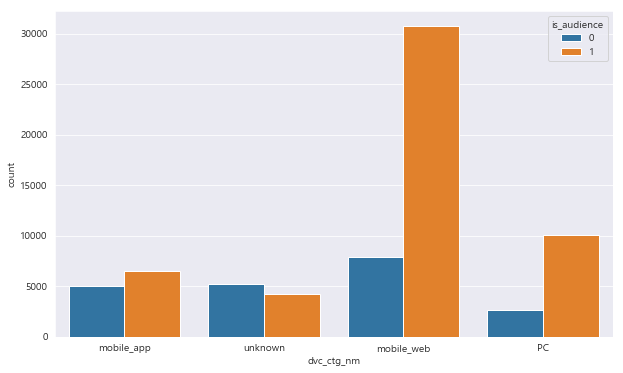

In [6]:
plt.figure(figsize = (10,6))
sns.countplot(data=tmp1.drop_duplicates(["clnt_id"], keep = 'first'), x="dvc_ctg_nm", hue="is_audience")

In [7]:
tmp1.drop_duplicates(["clnt_id"], keep = 'first').groupby(["dvc_ctg_nm","is_audience"]).size().reset_index(name = "counts")

,dvc_ctg_nm,is_audience,counts
0,PC,0,2608
1,PC,1,10068
2,mobile_app,0,5055
3,mobile_app,1,6479
4,mobile_web,0,7950
5,mobile_web,1,30758
6,unknown,0,5220
7,unknown,1,4261


In [8]:
clr_map = ['paleturquoise', 'lightblue', 'lightsteelblue', 'cornflowerblue','deepskyblue', "royalblue", 'darkcyan']

In [ ]:
clr_map_audience = []

In [ ]:
clr_map = ['paleturquoise', 'lightblue', 'deepskyblue', "royalblue"]

In [9]:
clr_map2 = ['palegreen', 'greenyellow', "lawngreen", 'darkseagreen']

Text(0.5, 0.98, '접속기기 분포 비교')

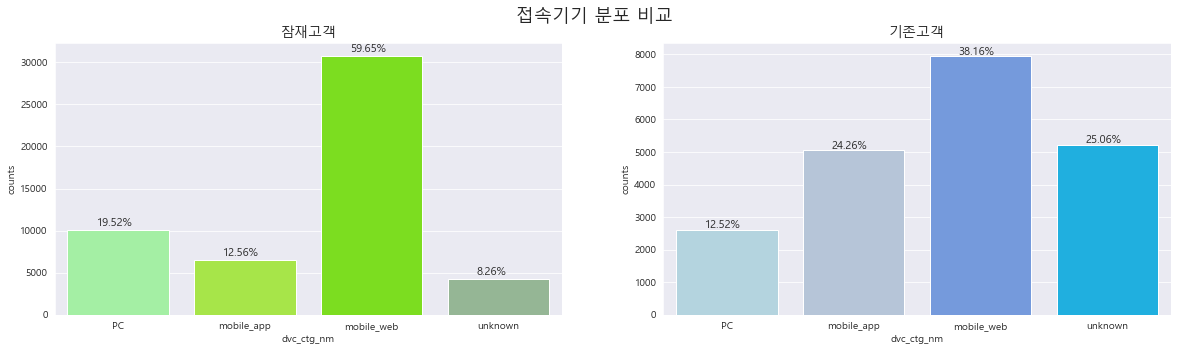

In [10]:
#g = sns.FacetGrid(tmp1.drop_duplicates(["clnt_id"], keep = 'first').groupby(["dvc_ctg_nm","is_audience"]).size().reset_index(name = "counts"), col = "is_audience")
#g.map(sns.barplot, "dvc_ctg_nm","counts")
tmp11 = tmp1.drop_duplicates(["clnt_id"], keep = 'first').groupby(["dvc_ctg_nm","is_audience"]).size().reset_index(name = "counts")
fig, ax = plt.subplots(ncols= 2, figsize = (20,5))
sns.barplot(data = tmp11[tmp11.is_audience == 1], x = "dvc_ctg_nm", y="counts", ax = ax[0], palette = clr_map2)
sns.barplot(data = tmp11[tmp11.is_audience == 0], x = "dvc_ctg_nm", y="counts", ax = ax[1], palette = clr_map[1:5])

tot1 = tmp11[tmp11.is_audience == 1].counts.sum()
tot2 = tmp11[tmp11.is_audience == 0].counts.sum()

for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width()/3.5, height+500,
              "{0:.2f}%".format(height / tot1 * 100), fontsize = 11)
    
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width()/3.5, height+50,
              "{0:.2f}%".format(height / tot2 * 100), fontsize = 11)
    
ax[0].set_title("잠재고객", fontsize = 14)
ax[1].set_title("기존고객", fontsize = 14)

plt.suptitle("접속기기 분포 비교", fontsize = 18)

In [ ]:
gc.collect()

###  접속경로 비교

In [125]:
clr_map = ['paleturquoise', 'lightblue', 'lightsteelblue', 'cornflowerblue','deepskyblue', "royalblue", 'darkcyan']

In [11]:
clr_map2_ = ['khaki','palegreen','lightgreen','greenyellow', "lawngreen",'limegreen','darkseagreen']

Text(0.5, 0.98, '접속경로 분포 비교')

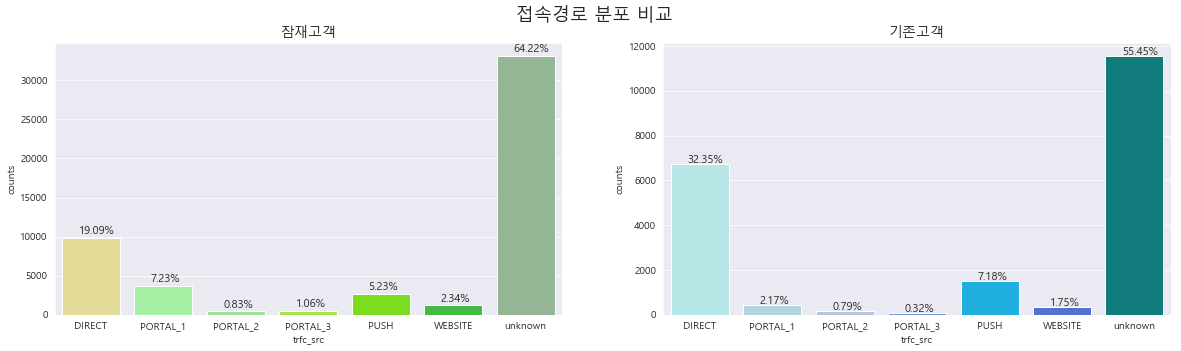

In [12]:
tmp12 = tmp1.drop_duplicates(["clnt_id"], keep = 'first').groupby(["trfc_src","is_audience"]).size().reset_index(name = "counts")
fig, ax = plt.subplots(ncols= 2, figsize = (20,5))
sns.barplot(data = tmp12[tmp12.is_audience == 1], x = "trfc_src", y="counts", ax = ax[0], palette=clr_map2_)
sns.barplot(data = tmp12[tmp12.is_audience == 0], x = "trfc_src", y="counts", ax = ax[1], palette=clr_map)

tot1 = tmp12[tmp12.is_audience == 1].counts.sum()
tot2 = tmp12[tmp12.is_audience == 0].counts.sum()

for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width()/3.5, height+500,
              "{0:.2f}%".format(height / tot1 * 100), fontsize = 11)
    
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width()/3.5, height+50,
              "{0:.2f}%".format(height / tot2 * 100), fontsize = 11)
    
ax[0].set_title("잠재고객", fontsize = 14)
ax[1].set_title("기존고객", fontsize = 14)

plt.suptitle("접속경로 분포 비교", fontsize = 18)

### 접속기기별접속경로

In [134]:
tmp2 = tmp1.groupby(["dvc_ctg_nm", "trfc_src" ,"is_audience"]).size().reset_index(name = "counts")

In [136]:
tmp2.loc[tmp2.is_audience == 1,"rate"] = np.round(tmp2.loc[tmp2.is_audience == 1,"counts"] / tmp2.loc[tmp2.is_audience == 1,"counts"].sum(),4) * 100
tmp2.loc[tmp2.is_audience == 0,"rate"] = np.round(tmp2.loc[tmp2.is_audience == 0,"counts"] / tmp2.loc[tmp2.is_audience == 0,"counts"].sum(),4) * 100

c:\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



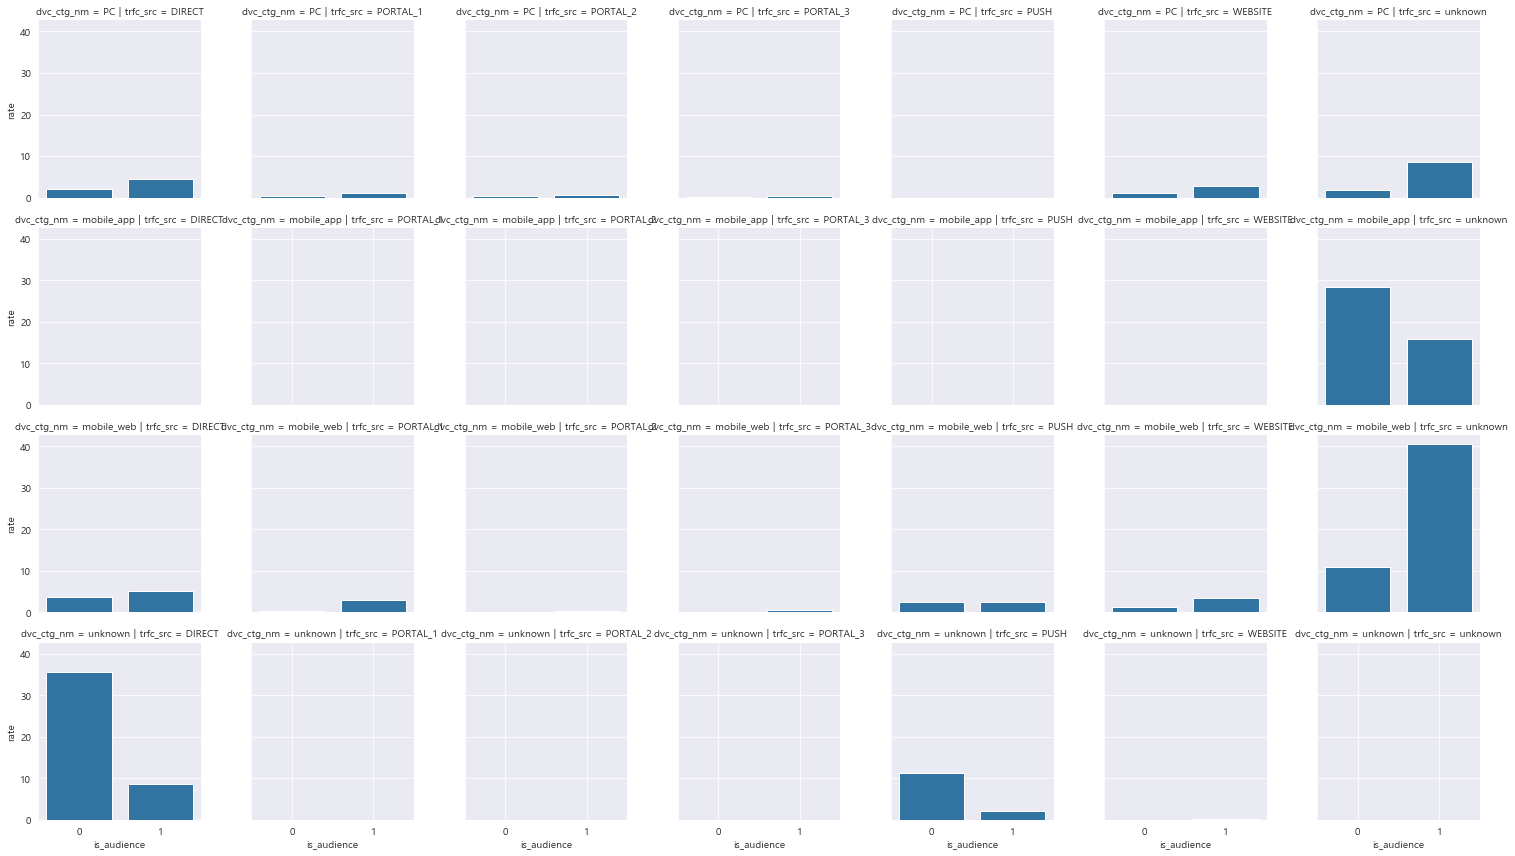

In [140]:
g = sns.FacetGrid(tmp2, col = "trfc_src", row="dvc_ctg_nm", palette=clr_map[:2])
g.map(sns.barplot, "is_audience", "rate")

In [137]:
tmp2

,dvc_ctg_nm,trfc_src,is_audience,counts,rate
0,PC,DIRECT,0,4376,1.95
1,PC,DIRECT,1,6394,4.47
2,PC,PORTAL_1,0,948,0.42
3,PC,PORTAL_1,1,1638,1.15
4,PC,PORTAL_2,0,611,0.27
5,PC,PORTAL_2,1,809,0.57
6,PC,PORTAL_3,0,89,0.04
7,PC,PORTAL_3,1,353,0.25
8,PC,PUSH,0,4,0.00
9,PC,PUSH,1,1,0.00


### 기기별, 경로별 구매율 

In [143]:
purc_rate_df = online_df.merge(pd.read_csv("buying_sess_df.csv"), how = "left")

In [144]:
purc_rate_df.groupby([])

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,is_audience,buying_sess
0,1,1,1,0,A01,20190911,16:14,11,0.0,과일선물세트,...,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1,0
1,1,1,2,0,A01,20190911,16:15,22,0.0,과일선물세트 백화점,...,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1,0
2,1,1,3,0,A01,20190911,16:15,36,0.0,과일바구니,...,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1,0
3,1,2,1,0,A01,20190922,14:09,41,0.0,초등가을잠바,...,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1,0
4,1,2,2,0,A01,20190922,14:10,56,0.0,초등가을점퍼,...,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1,0
5,1,2,3,0,A01,20190922,14:10,70,0.0,초등남아옷,...,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1,0
6,1,2,4,0,A01,20190922,14:11,119,0.0,초등남아점퍼,...,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1,0
7,1,2,5,0,A01,20190922,14:11,162,0.0,노스페이스키즈,...,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1,0
8,1,2,6,0,A01,20190922,14:12,178,0.0,노스페이스초등,...,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1,0
9,1,2,7,0,A01,20190922,14:12,192,0.0,노스페이스키즈,...,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1,0


In [146]:
dvc_sale = online_df[online_df.action_type==6].drop_duplicates(["sess_id","clnt_id"], keep = "first").groupby(["dvc_ctg_nm"]).size().reset_index(name = "tot_sales")
dvc_sess = online_df.drop_duplicates(["clnt_id","sess_id"] , keep = "first").groupby(["dvc_ctg_nm"]).size().reset_index(name = "tot_sess")
dvc_sale = dvc_sale.merge(dvc_sess)
dvc_sale["purc_rate"] = np.round(dvc_sale.tot_sales / dvc_sale.tot_sess, 4) * 100

In [147]:
dvc_sale

,dvc_ctg_nm,tot_sales,tot_sess,purc_rate
0,PC,3603,37474,9.61
1,mobile_app,12155,86619,14.03
2,mobile_web,12107,122547,9.88
3,unknown,19542,120509,16.22


Text(0.5, 1.0, '접속기기별 구매율')

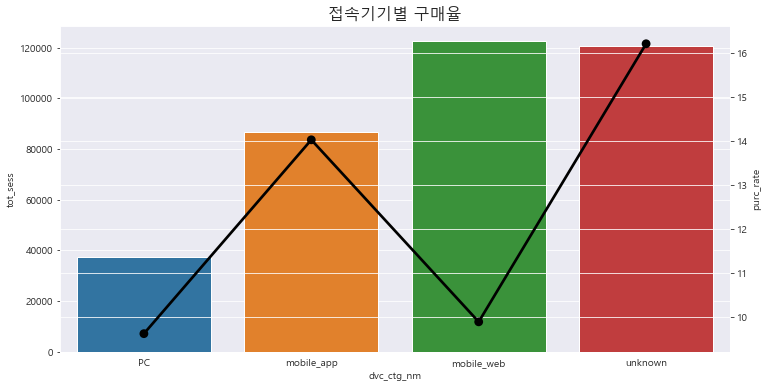

In [172]:
fig, ax = plt.subplots(figsize=  (12,6))
sns.barplot(x=dvc_sale.dvc_ctg_nm, y=dvc_sale.tot_sess)

tot = dvc_sale.tot_sess.sum()
g1 = ax.twinx()
g1 = sns.pointplot(x = dvc_sale.dvc_ctg_nm, y=dvc_sale.purc_rate, color = 'k')
"""
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/3, height + 1000,
           "{:.2f}%".format(height/tot*100), fontsize = 11)
"""
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x() + p.get_width()/3, height + 1000,
           "{}%".format(height), fontsize = 11)
    
ax.set_title("접속기기별 구매율", fontsize = 16)

In [173]:
dvc_sale = online_df[online_df.action_type==6].drop_duplicates(["sess_id","clnt_id"], keep = "first").groupby(["trfc_src"]).size().reset_index(name = "tot_sales")
dvc_sess = online_df.drop_duplicates(["clnt_id","sess_id"] , keep = "first").groupby(["trfc_src"]).size().reset_index(name = "tot_sess")
dvc_sale = dvc_sale.merge(dvc_sess)
dvc_sale["purc_rate"] = np.round(dvc_sale.tot_sales / dvc_sale.tot_sess, 4) * 100

In [175]:
dvc_sale

,trfc_src,tot_sales,tot_sess,purc_rate
0,DIRECT,19361,118535,16.33
1,PORTAL_1,422,7725,5.46
2,PORTAL_2,312,2178,14.33
3,PORTAL_3,73,1605,4.55
4,PUSH,5508,37615,14.64
5,WEBSITE,622,14395,4.32
6,unknown,21109,185096,11.40


Text(0.5, 1.0, '접속경로별 구매율')

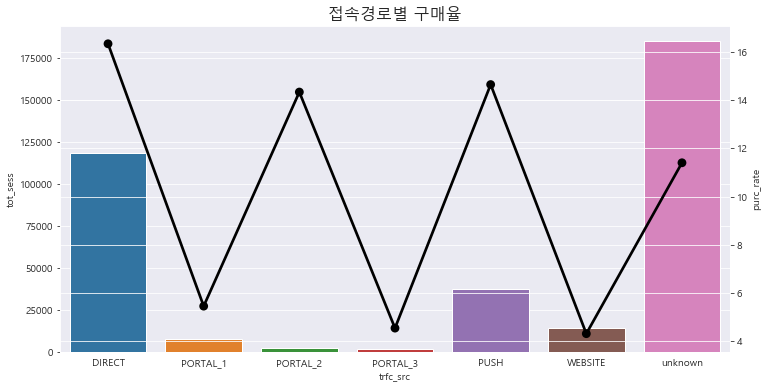

In [174]:
fig, ax = plt.subplots(figsize=  (12,6))
sns.barplot(x=dvc_sale.trfc_src, y=dvc_sale.tot_sess)

tot = dvc_sale.tot_sess.sum()
g1 = ax.twinx()
g1 = sns.pointplot(x = dvc_sale.trfc_src, y=dvc_sale.purc_rate, color = 'k')
"""
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/3, height + 1000,
           "{:.2f}%".format(height/tot*100), fontsize = 11)
"""
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x() + p.get_width()/3, height + 1000,
           "{}%".format(height), fontsize = 11)
    
ax.set_title("접속경로별 구매율", fontsize = 16)